<a href="https://colab.research.google.com/github/mateo020/CyclingCollisions-Data/blob/main/CyclingCollisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_rows',10)
pd.options.mode.chained_assignment = None
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Cyclists.csv',low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                1779 non-null   float64
 1   Y                1779 non-null   float64
 2   INDEX_           1779 non-null   int64  
 3   ACCNUM           1779 non-null   int64  
 4   YEAR             1779 non-null   int64  
 5   DATE             1779 non-null   object 
 6   TIME             1779 non-null   int64  
 7   HOUR             1779 non-null   int64  
 8   STREET1          1779 non-null   object 
 9   STREET2          1779 non-null   object 
 10  OFFSET           1779 non-null   object 
 11  ROAD_CLASS       1779 non-null   object 
 12  DISTRICT         1779 non-null   object 
 13  WARDNUM          1779 non-null   object 
 14  DIVISION         1779 non-null   object 
 15  LATITUDE         1779 non-null   float64
 16  LONGITUDE        1779 non-null   float64
 17  LOCCOORD      

The goal of this Data exploration Project is gain an undertanding of the causes of bycicle related accidents fatal, and nonfatal in the city of Toronto.

Some points of interest: Cause, location, roadType, avg_traffic, what time, type of vehicle.

# Location

In [ ]:
## since this data dates back to 2013 I migth want o look at data from the last 6 years
df1 = df[df['YEAR'] > 2016]

In [ ]:
n = 10
df1['STREET1'].value_counts()[:n]


BLOOR ST W      23
DUNDAS ST W     20
DUFFERIN ST     13
GERRARD ST E    11
DANFORTH AVE    10
YONGE ST         8
DUNDAS ST E      7
BRIMLEY RD       7
QUEEN ST E       7
KENNEDY RD       6
Name: STREET1, dtype: int64

In [ ]:
n = 10
df1['STREET2'].value_counts()[:n]

<Null>              42
BERKELEY ST          7
CARLAW AVE           6
SPADINA RD           5
KINGSTON RD          5
VICTORIA PARK AV     5
FOXRIDGE DR          5
WOODYCREST AVE       4
SCARLETT RD          4
JONES AVE            4
Name: STREET2, dtype: int64

The most common streets where accidents accour, 'DUNDAS ST W' being the most common street for an accident.

Number of collisions:

In [ ]:
n = 10
df1['STREET2'].value_counts()[:n]

<Null>              42
BERKELEY ST          7
CARLAW AVE           6
SPADINA RD           5
KINGSTON RD          5
VICTORIA PARK AV     5
FOXRIDGE DR          5
WOODYCREST AVE       4
SCARLETT RD          4
JONES AVE            4
Name: STREET2, dtype: int64

In [ ]:
n = 10
df1['STREET1'].value_counts()[:n]

BLOOR ST W      23
DUNDAS ST W     20
DUFFERIN ST     13
GERRARD ST E    11
DANFORTH AVE    10
YONGE ST         8
DUNDAS ST E      7
BRIMLEY RD       7
QUEEN ST E       7
KENNEDY RD       6
Name: STREET1, dtype: int64

Overall accidents: Break down by road type

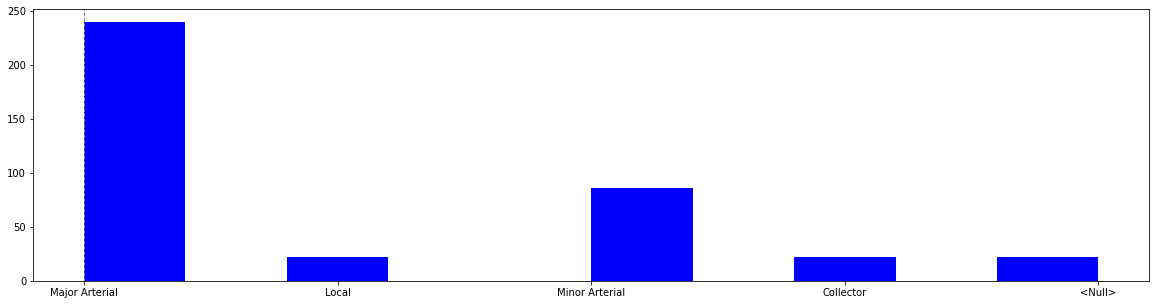

In [ ]:
import matplotlib.pyplot as plt
bars = plt.hist(df1['ROAD_CLASS'],bins = 10, color = 'blue')

plt.axvline(x =0, linestyle = '--', linewidth = 1, color = 'grey')

fig = plt.gcf()
fig.set_size_inches(20,5)

Look at the most common injuries on accidents in major arterial roads

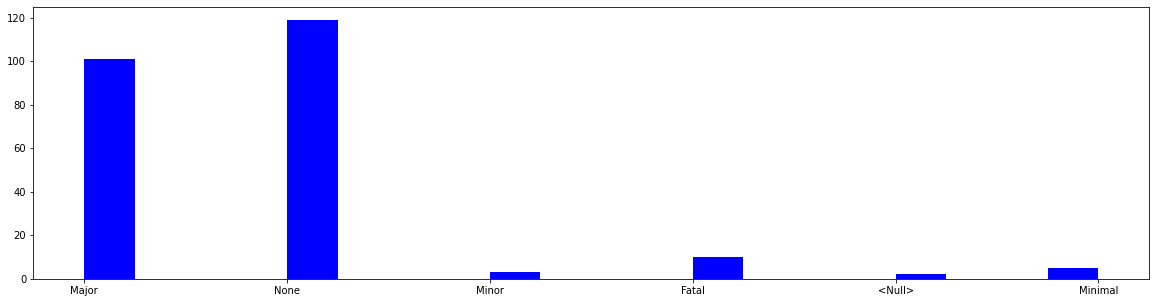

In [ ]:


major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)


Break down of injuries on Local roads

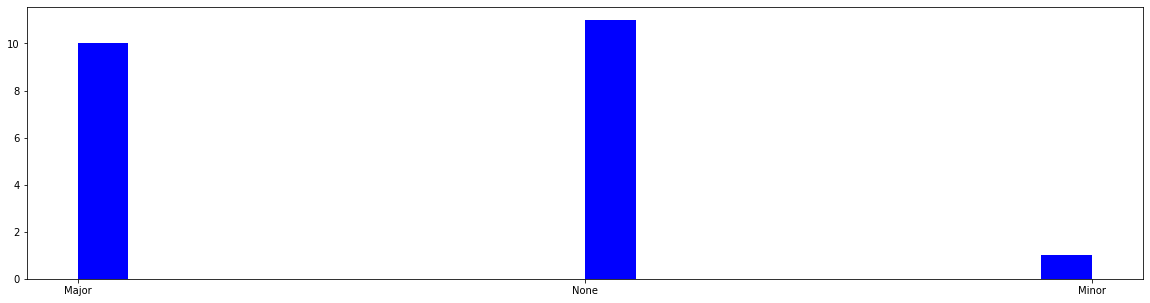

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Local']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

Break down of injuries on minor arterial roads

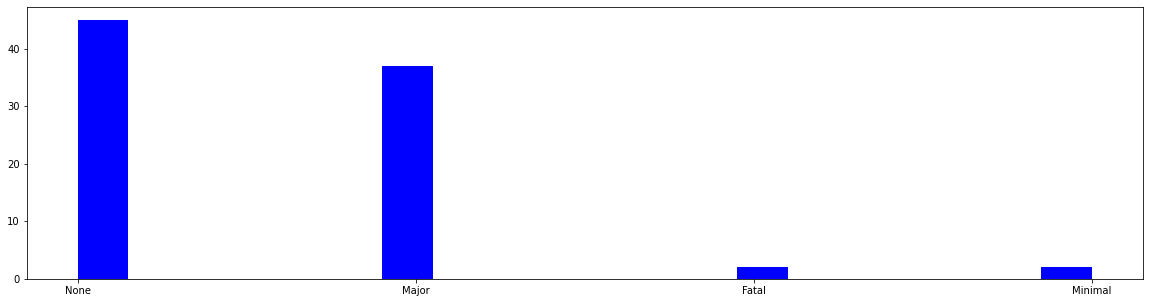

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Minor Arterial']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

Breakdown of injuries on Collector road:

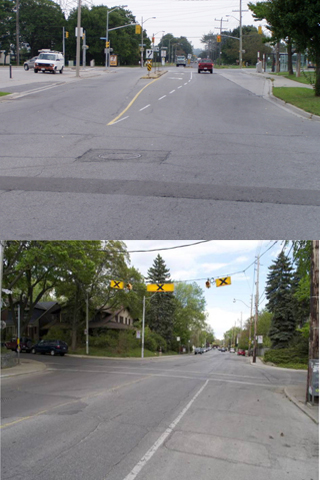

A collector road: 
Provide access to property and traffic movement.
2,500 to 8,000 vehicles per day.

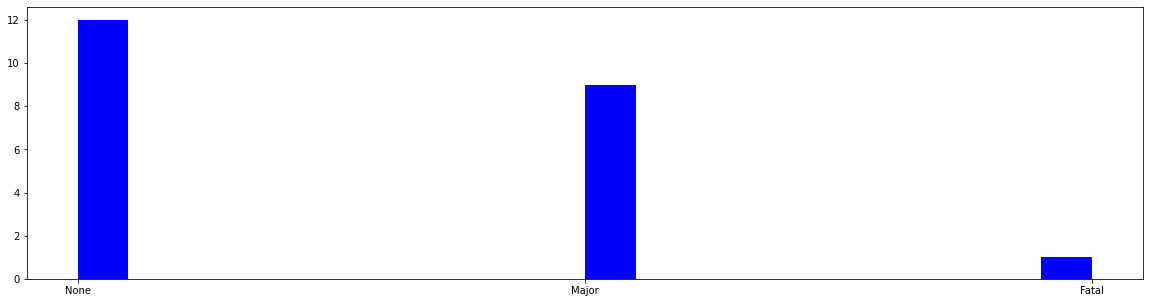

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Collector']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

On all types of roads most collision result in either no injuries of major injuries. Minor and Major arterial road acount for majority of incidents, including majority of fatal incidents. This could be attributed to the high volume of car traffic aswell as a primary path for a cyclist to get from point a to point b.

# Major, Minor Roads accident break down

In [ ]:
df1 = df[df['YEAR'] > 2016]


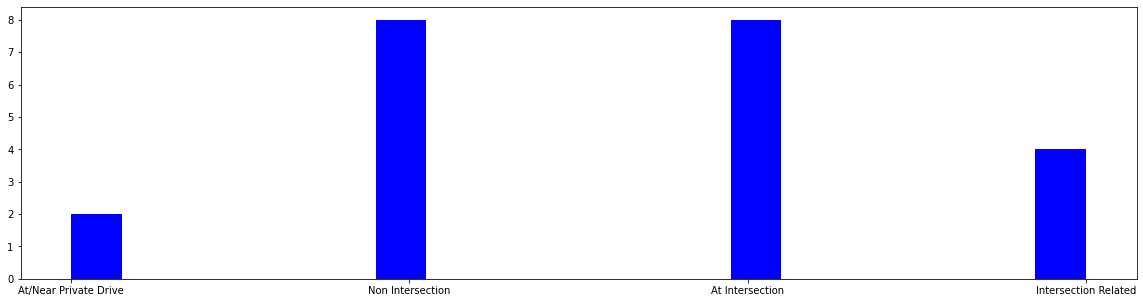

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Collector']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

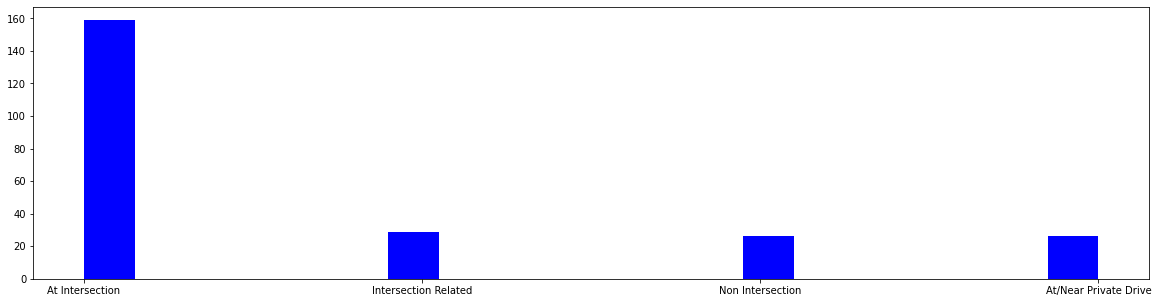

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

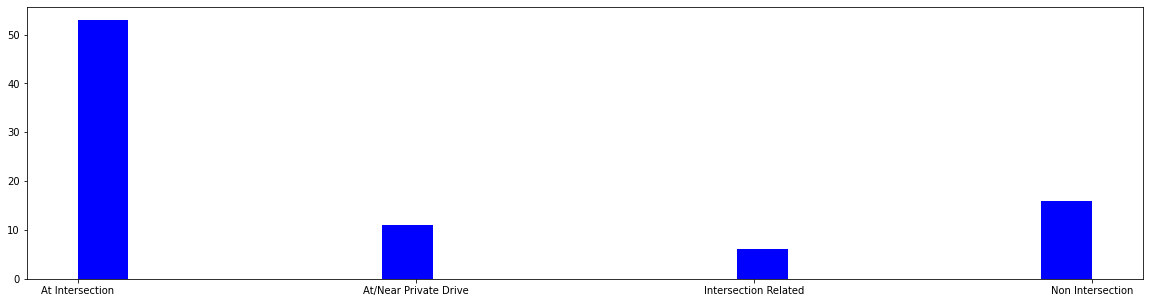

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Minor Arterial']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

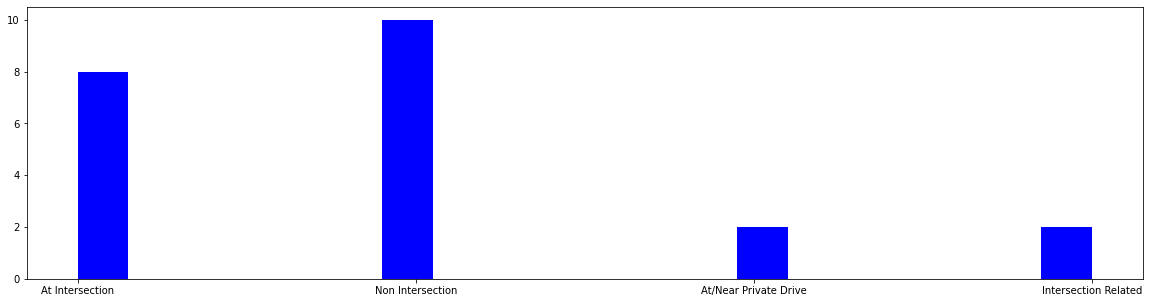

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Local']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

# Accidents at intersections

Focusing on major and minor arterial roads intersection driver manuver and cyclist acc, The goal is too determine possible manuvers that corrolate with cyling injuries.


Major Roads

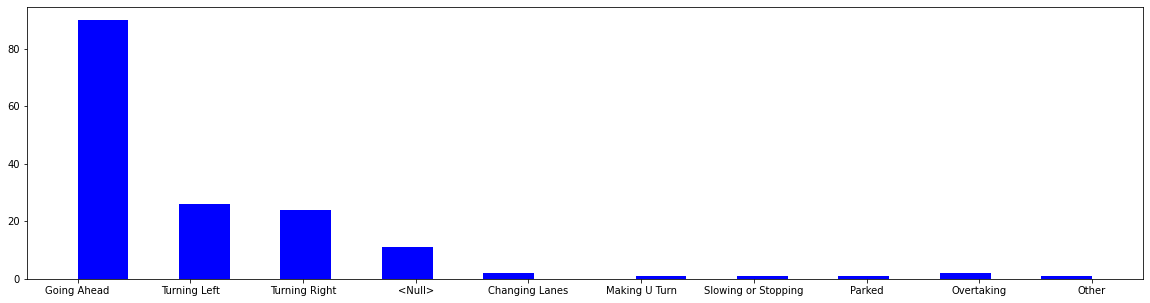

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['MANOEUVER'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(20,5)

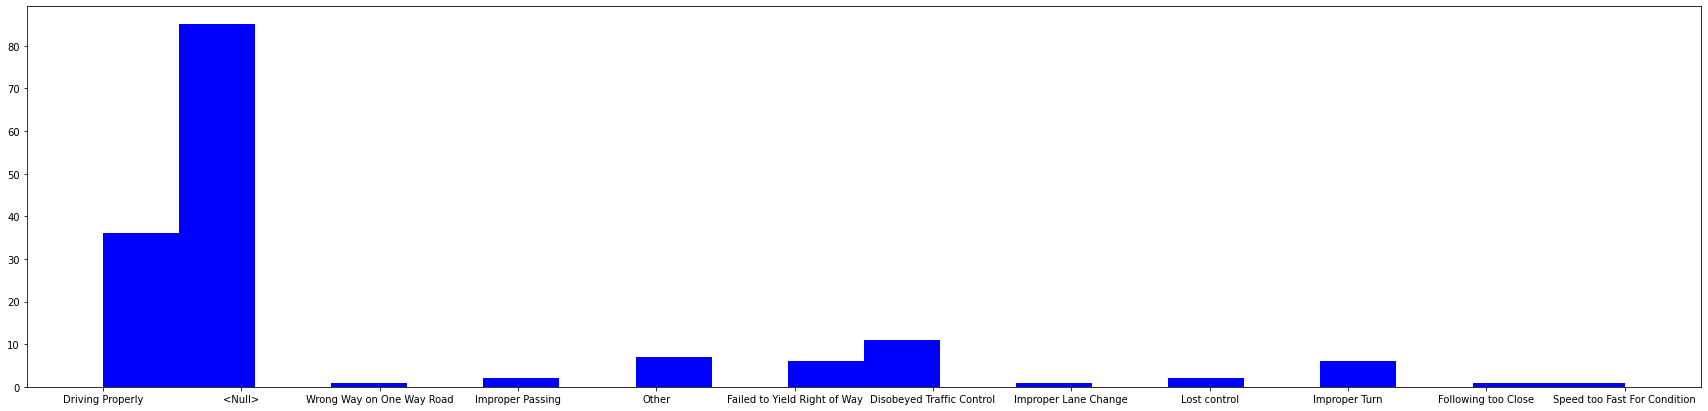

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['CYCACT'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(30,7)

Minor arterial

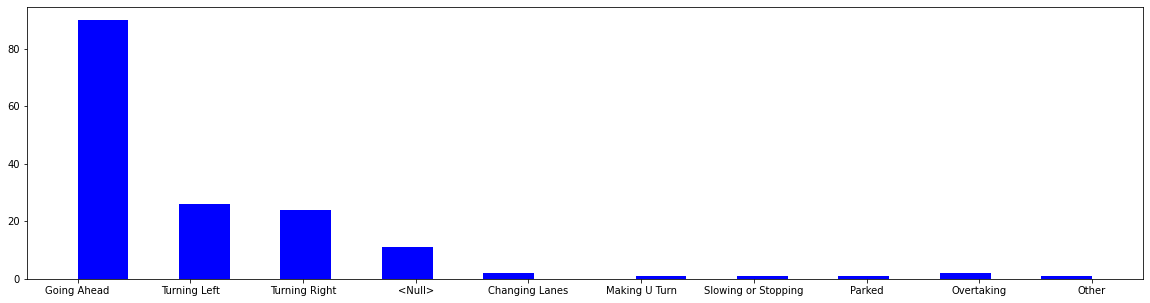

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['MANOEUVER'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(20,5)

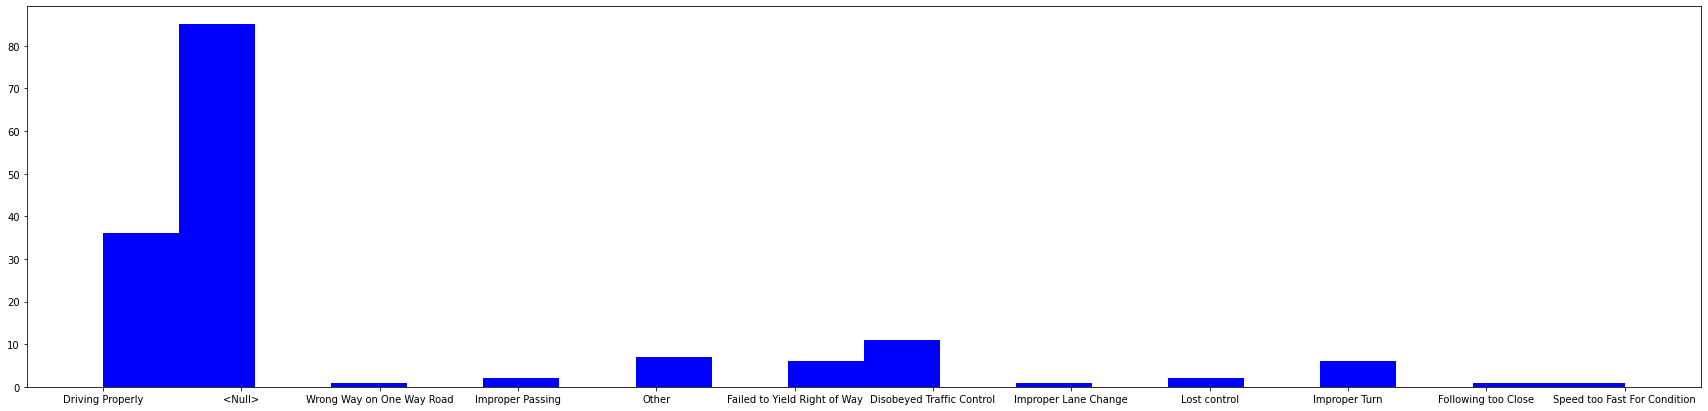

In [ ]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['CYCACT'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(30,7)

# Neighbourhoods

Taking a look at what neighbourhoods
 have the most anount of reported accidents in order to see if potentially infracture in these areas could be inproved:

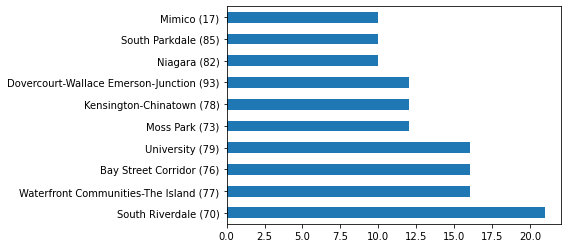

In [ ]:

df1['NEIGHBOURHOOD'].value_counts()[:10].plot(kind = 'barh')

What questions does this information asnwer?
1. Where are these accidents occouring?
Most collisions occur at intersections in heavly transited roads (major and minor arterial). Majority of accidents clyclist-Vehicle collisions at intersection involving a vehicle going ahead. Vehicles performing turns at intersections make up the next biggest amount of accidents at iintersections. 


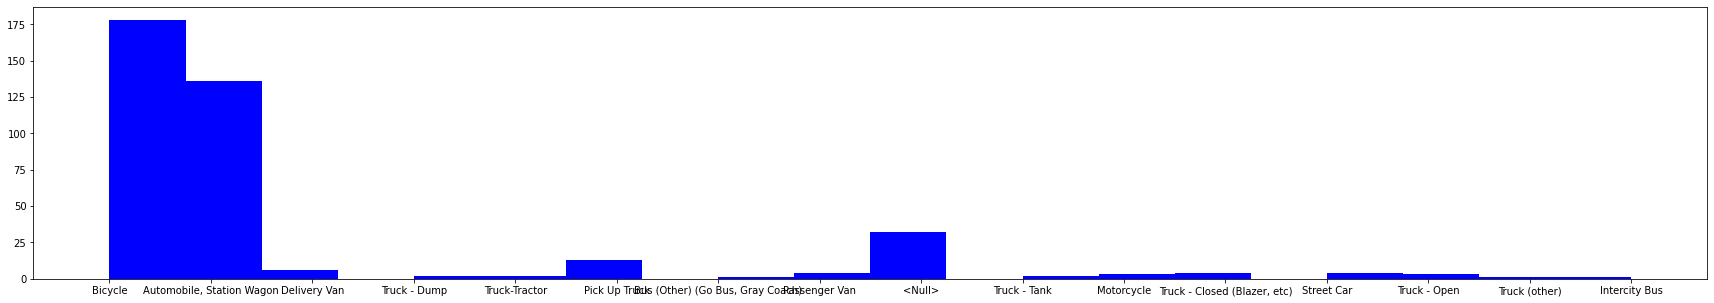

In [ ]:

bars = plt.hist( df1['VEHTYPE'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(30,5)

# Geomaping
2. Where should bike infractructure be focused to prevent potential collision?

2. Did already bike infracture proof useful?